### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
df19=pd.read_csv('Jan_2019_ontime.csv')
df20=pd.read_csv('Jan_2020_ontime.csv')

In [3]:
df19.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN


In [4]:
df20.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,3,EV,20366,EV,N48901,4397,13930,1393007,ORD,...,GRB,1003.0,0.0,1000-1059,1117.0,0.0,0.0,0.0,174.0,NaN
1,1,3,EV,20366,EV,N16976,4401,15370,1537002,TUL,...,ORD,1027.0,0.0,1000-1059,1216.0,0.0,0.0,0.0,585.0,NaN
2,1,3,EV,20366,EV,N12167,4404,11618,1161802,EWR,...,TYS,1848.0,0.0,1800-1859,2120.0,0.0,0.0,0.0,631.0,NaN
3,1,3,EV,20366,EV,N14902,4405,10781,1078105,BTR,...,IAH,1846.0,0.0,1800-1859,2004.0,0.0,0.0,0.0,253.0,NaN
4,1,3,EV,20366,EV,N606UX,4407,14524,1452401,RIC,...,IAH,1038.0,0.0,1000-1059,1330.0,0.0,0.0,0.0,1157.0,NaN


In [5]:
df19.drop('Unnamed: 21',axis=1,inplace=True)
df20.drop('Unnamed: 21',axis=1,inplace=True)

In [6]:
df19['OP_CARRIER_AIRLINE_ID'].unique()

array([20363, 19805, 20398, 20368, 20397, 20409, 20378, 20366, 20436,
       20452, 19690, 20416, 20304, 19393, 19930, 19977, 19790],
      dtype=int64)

In [7]:
df19['OP_CARRIER'].unique()

array(['9E', 'AA', 'MQ', 'G4', 'OH', 'B6', 'YV', 'EV', 'F9', 'YX', 'HA',
       'NK', 'OO', 'WN', 'AS', 'UA', 'DL'], dtype=object)

### Merge the Two Dataframes

In [8]:
both_frames=[df19,df20]
df=pd.concat(both_frames)
df.reset_index(drop=True,inplace=True)

In [9]:
## Merged Data Table
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,1039707,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,1119302,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,1119302,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,1039707,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,1177801,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0


In [10]:
#Number of null values
df.isnull().sum()

DAY_OF_MONTH                 0
DAY_OF_WEEK                  0
OP_UNIQUE_CARRIER            0
OP_CARRIER_AIRLINE_ID        0
OP_CARRIER                   0
TAIL_NUM                  3241
OP_CARRIER_FL_NUM            0
ORIGIN_AIRPORT_ID            0
ORIGIN_AIRPORT_SEQ_ID        0
ORIGIN                       0
DEST_AIRPORT_ID              0
DEST_AIRPORT_SEQ_ID          0
DEST                         0
DEP_TIME                 23016
DEP_DEL15                23054
DEP_TIME_BLK                 0
ARR_TIME                 24136
ARR_DEL15                26100
CANCELLED                    0
DIVERTED                     0
DISTANCE                     0
dtype: int64

In [11]:
#Filling Missing Values
df19 = df19.fillna(method ='pad')
df20 = df20.fillna(method ='pad')

In [12]:
df19.isnull().sum()

DAY_OF_MONTH             0
DAY_OF_WEEK              0
OP_UNIQUE_CARRIER        0
OP_CARRIER_AIRLINE_ID    0
OP_CARRIER               0
TAIL_NUM                 0
OP_CARRIER_FL_NUM        0
ORIGIN_AIRPORT_ID        0
ORIGIN_AIRPORT_SEQ_ID    0
ORIGIN                   0
DEST_AIRPORT_ID          0
DEST_AIRPORT_SEQ_ID      0
DEST                     0
DEP_TIME                 0
DEP_DEL15                0
DEP_TIME_BLK             0
ARR_TIME                 0
ARR_DEL15                0
CANCELLED                0
DIVERTED                 0
DISTANCE                 0
dtype: int64

### Exploratory Data Analysis to Understand Pattern of Cancelled Flights

In [18]:
pl_1=df.groupby('DAY_OF_MONTH')['CANCELLED'].count()
fig = go.Figure()
fig.add_trace(go.Bar(x=pl_1.index,y=pl_1.values,name='Cancelled'))
fig.add_trace(go.Scatter(x=pl_1.index, y=pl_1.values, line=dict(color='red'), name='Cancel trend'))
fig.update_layout(
    title="Cancelled Flights vs Day of Month",
    xaxis_title="Day of Month (Jan.)",
    yaxis_title="Cancel Count",
)
fig.show()

In [16]:
df1 = df19[['OP_CARRIER','ORIGIN','DEST','DAY_OF_MONTH','DEP_TIME','ARR_TIME','DISTANCE','CANCELLED']]
df1.head()

,OP_CARRIER,ORIGIN,DEST,DAY_OF_MONTH,DEP_TIME,ARR_TIME,DISTANCE,CANCELLED
0,9E,GNV,ATL,1,601.0,722.0,300.0,0.0
1,9E,MSP,CVG,1,1359.0,1633.0,596.0,0.0
2,9E,DTW,CVG,1,1215.0,1329.0,229.0,0.0
3,9E,TLH,ATL,1,1521.0,1625.0,223.0,0.0
4,9E,ATL,FSM,1,1847.0,1940.0,579.0,0.0


In [17]:
df1.dtypes

OP_CARRIER       object
ORIGIN           object
DEST             object
DAY_OF_MONTH      int64
DEP_TIME        float64
ARR_TIME        float64
DISTANCE        float64
CANCELLED       float64
dtype: object

In [21]:
# Encoding Categorical Variables
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [22]:
pd.options.mode.chained_assignment = None
df1['OP_CARRIER']= label_encoder.fit_transform(df1['OP_CARRIER'])
df1['ORIGIN']= label_encoder.fit_transform(df1['ORIGIN'])
df1['DEST']= label_encoder.fit_transform(df1['DEST'])

In [23]:
#Separating Independent and Dependent Variables
X=df1.drop('CANCELLED',axis=1)
y=df1['CANCELLED']

In [24]:
X.shape

(583985, 7)

### Splitting Data into Training and Test Set

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Decision Tree Algorithm

In [27]:
from sklearn.tree import DecisionTreeClassifier
tree_algo = DecisionTreeClassifier()
tree_algo.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
y_pred = tree_algo.predict(X_test)

In [29]:
accuracy_score(y_test,y_pred)

0.9661807347199708

#### 96.6% accuracy with Decision Tree Algorithm

### Naive Bayes 

In [30]:
from sklearn.naive_bayes import GaussianNB
GN_nb = GaussianNB()
model = GN_nb.fit(X_train, y_train)

In [31]:
y_pred = model.predict(X_test)

In [32]:
accuracy_score(y_test,y_pred)

0.9709411173771091

#### 97.1% accuracy with Naive Bayes

### Neural Network using Keras

In [36]:
from keras.models import Sequential
from keras.layers import Dense

In [37]:
model = Sequential([Dense(32, activation='relu', input_shape=(7,)),Dense(32, activation='relu'), Dense(1, activation='sigmoid'),
])

In [40]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [41]:
hist = model.fit(X_train, y_train,
          batch_size=32, epochs=100,
          validation_data=(X_test, y_test))

Epoch 1/100
12775/12775 [==============================] - 9s 731us/step - loss: 2.2016 - accuracy: 0.9712 - val_loss: 0.2406 - val_accuracy: 0.9709
Epoch 2/100
12775/12775 [==============================] - 9s 731us/step - loss: 0.1294 - accuracy: 0.9715 - val_loss: 0.2405 - val_accuracy: 0.9709
Epoch 3/100
12775/12775 [==============================] - 9s 735us/step - loss: 0.1295 - accuracy: 0.9715 - val_loss: 0.2407 - val_accuracy: 0.9709
Epoch 4/100
12775/12775 [==============================] - 10s 745us/step - loss: 0.1294 - accuracy: 0.9715 - val_loss: 0.2405 - val_accuracy: 0.9709
Epoch 5/100
12775/12775 [==============================] - 9s 731us/step - loss: 0.1294 - accuracy: 0.9715 - val_loss: 0.2405 - val_accuracy: 0.9709
Epoch 6/100
12775/12775 [==============================] - 10s 777us/step - loss: 0.1294 - accuracy: 0.9715 - val_loss: 0.2405 - val_accuracy: 0.9709
Epoch 7/100
12775/12775 [==============================] - 9s 674us/step - loss: 0.1295 - accuracy: 0.97

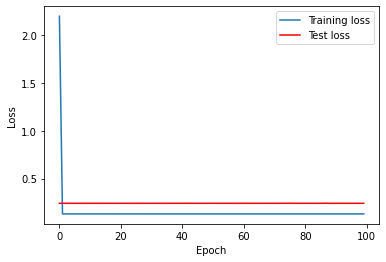

In [43]:
plt.plot(hist.history['loss'], label='Training loss')
plt.plot(hist.history['val_loss'], color='red', label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()